In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/"My Drive/loan defaulter Aws"

final.csv  test_bqCt9Pv.csv  train.csv


**Importing the necessary modules**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from datetime import date

**Uploading and reading the train and test data files**

In [0]:
df = pd.read_csv('drive/My Drive/loan defaulter Aws/train.csv')
df_test = pd.read_csv('drive/My Drive/loan defaulter Aws/test_bqCt9Pv.csv')

In [0]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [0]:
df['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

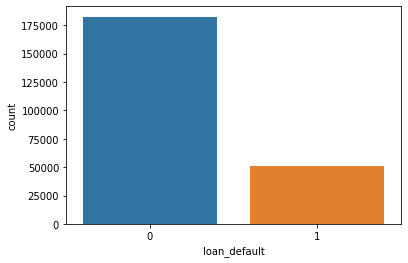

In [0]:
sns.countplot(x='loan_default', data=df)

In [0]:
df_test.shape

(112392, 40)

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             112392 non-null  int64  
 1   disbursed_amount                     112392 non-null  int64  
 2   asset_cost                           112392 non-null  int64  
 3   ltv                                  112392 non-null  float64
 4   branch_id                            112392 non-null  int64  
 5   supplier_id                          112392 non-null  int64  
 6   manufacturer_id                      112392 non-null  int64  
 7   Current_pincode_ID                   112392 non-null  int64  
 8   Date.of.Birth                        112392 non-null  object 
 9   Employment.Type                      108949 non-null  object 
 10  DisbursalDate                        112392 non-null  object 
 11  State_ID     

In [0]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


**Check Unique values of all the column**

In [0]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

UniqueID
[420825 537409 417566 ... 613658 548084 630213]
------------------------------------------------------------
disbursed_amount
[50578 47145 53278 ... 61456 51406 34259]
------------------------------------------------------------
asset_cost
[ 58400  65550  61360 ...  45233  52965 116009]
------------------------------------------------------------
ltv
[89.55 73.23 89.63 ... 33.32 32.53 33.82]
------------------------------------------------------------
branch_id
[ 67  78  34 130  74  11   5  20  63  48  79   3  42 142  36  16 146 147
  65   9   1 152  29  10  70  19   7  85  61  17   8 153  18 162  68  72
  64   2 160 251 103 104 120 136  77  13 138 135  73 248  15 165  62  76
 105 249 250 255 254  82 158 159 117 202 259 207  35  69  97  43 257 258
 260 111  66 261 101  14 121 217  84 100]
------------------------------------------------------------
supplier_id
[22807 22744 17014 ... 23618 22289 24031]
------------------------------------------------------------
manufacturer_id

**List of numeric columns**

In [0]:

### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

**List of Categorical columns**

In [0]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols


['Date.of.Birth',
 'Employment.Type',
 'DisbursalDate',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH']

# **Data cleaning and encoding**

In [0]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], errors='coerce')
now = pd.to_datetime('now')
df['age']=(now.year - df['Date.of.Birth'].dt.year) - ((now.month - df['Date.of.Birth'].dt.month) < 0)

df_test['Date.of.Birth'] = pd.to_datetime(df_test['Date.of.Birth'], errors='coerce')
now = pd.to_datetime('now')
df_test['age']=(now.year - df_test['Date.of.Birth'].dt.year) - ((now.month - df_test['Date.of.Birth'].dt.month) < 0)

In [0]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors='coerce')
now = pd.to_datetime('now')
df['loan_age']=(now.year - df['DisbursalDate'].dt.year) - ((now.month - df['DisbursalDate'].dt.month) < 0)



df_test['DisbursalDate'] = pd.to_datetime(df_test['DisbursalDate'], errors='coerce')
now = pd.to_datetime('now')
df_test['loan_age']=(now.year - df_test['DisbursalDate'].dt.year) - ((now.month - df_test['DisbursalDate'].dt.month) < 0)

In [0]:
df.rename(columns={'Employment.Type': 'Employment_Type'}, inplace=True)
mode_ = df.Employment_Type.dropna().mode()[0]
df['Employment_Type'] = df['Employment_Type'].fillna(mode_)
df['Employment_Type'] = df['Employment_Type'].map( {'Salaried': 1, 'Self employed': 0} ).astype(int)

df_test.rename(columns={'Employment.Type': 'Employment_Type'}, inplace=True)
mode_ = df_test.Employment_Type.dropna().mode()[0]
df_test['Employment_Type'] = df_test['Employment_Type'].fillna(mode_)
df_test['Employment_Type'] = df_test['Employment_Type'].map( {'Salaried': 1, 'Self employed': 0} ).astype(int)



In [0]:
df.rename(columns={'AVERAGE.ACCT.AGE': 'AVERAGE_ACCT_AGE'}, inplace=True)
df[['year','month']] = df.AVERAGE_ACCT_AGE.str.split(expand=True)

df['year'] = df['year'].str.replace('yrs','')

df['month'] = df['month'].str.replace('mon','')
df['month'] = df['month'].astype(int)
df['month'] = df['month']/12
df['month'] = df['month'].astype(str)
df['avg_accage'] = df['year']+df['month']
df['avg_accage'].head()

df_test.rename(columns={'AVERAGE.ACCT.AGE': 'AVERAGE_ACCT_AGE'}, inplace=True)
df_test[['year','month']] = df_test.AVERAGE_ACCT_AGE.str.split(expand=True)

df_test['year'] = df_test['year'].str.replace('yrs','')

df_test['month'] = df_test['month'].str.replace('mon','')
df_test['month'] = df_test['month'].astype(int)
df_test['month'] = df_test['month']/12
df_test['month'] = df_test['month'].astype(str)
df_test['avg_accage'] = df_test['year']+df_test['month']
df_test['avg_accage'].head()

0                   00.0
1    00.6666666666666666
2                   00.0
3    20.4166666666666667
4                   00.0
Name: avg_accage, dtype: object

In [0]:
df.rename(columns={'CREDIT.HISTORY.LENGTH': 'CREDIT_HISTORY_LENGTH'}, inplace=True)
df[['credyear','credmonth']] = df.CREDIT_HISTORY_LENGTH.str.split(expand=True)

df['credyear'] = df['credyear'].str.replace('yrs','')

df['credmonth'] = df['credmonth'].str.replace('mon','')
df['credmonth'] = df['credmonth'].astype(int)
df['credmonth'] = df['credmonth']/12
df['credmonth'] = df['credmonth'].astype(str)
df['avg_credage'] = df['credyear']+df['credmonth']
df['avg_credage'].astype(float)

df_test.rename(columns={'CREDIT.HISTORY.LENGTH': 'CREDIT_HISTORY_LENGTH'}, inplace=True)
df_test[['credyear','credmonth']] = df_test.CREDIT_HISTORY_LENGTH.str.split(expand=True)

df_test['credyear'] = df_test['credyear'].str.replace('yrs','')

df_test['credmonth'] = df_test['credmonth'].str.replace('mon','')
df_test['credmonth'] = df_test['credmonth'].astype(int)
df_test['credmonth'] = df_test['credmonth']/12
df_test['credmonth'] = df_test['credmonth'].astype(str)
df_test['avg_credage'] = df_test['credyear']+df_test['credmonth']
df_test['avg_credage'].astype(float)

0          0.000000
1         10.000000
2          0.000000
3         20.416667
4          0.000000
            ...    
112387     0.000000
112388     0.000000
112389    90.416667
112390     0.250000
112391     0.000000
Name: avg_credage, Length: 112392, dtype: float64

In [0]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

In [0]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

# **#Training model**

In [0]:
X = df[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 
       'Employment_Type', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 
       'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','age', 'loan_age','avg_accage','avg_credage']]

y = df['loan_default'] 

X1 = df_test[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 
       'Employment_Type', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 
       'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','age', 'loan_age','avg_accage','avg_credage']]

      

# **Spliting into train and test**

In [0]:
X_train_im, X_test_im, y_train_im, y_test_im= train_test_split(X,y, test_size=0.3, random_state=0)

In [0]:
#Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

#Fitting on data
rf_clf.fit(X_train_im, y_train_im)

#Scoring the model on train data
score_rf=rf_clf.score(X_train_im, y_train_im)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=rf_clf.score(X_test_im, y_test_im)
print("Testing score: %.2f " % score_rf)

y_pred_rf = rf_clf.predict(X_test_im)
print(y_pred_rf)


Training score: 0.78 
Testing score: 0.78 
[0 0 0 ... 0 0 0]


In [0]:
test_d = pd.DataFrame({"predicted": y_pred_rf})
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69947 entries, 0 to 69946
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   predicted  69947 non-null  int64
dtypes: int64(1)
memory usage: 546.6 KB


In [0]:
test_d['predicted'].value_counts()

0    69880
1       67
Name: predicted, dtype: int64

In [0]:
generate_model_report(y_test_im,y_pred_rf)

Accuracy =  0.7835361059087594
Precision =  0.7014925373134329
Recall =  0.0030986286919831223
F1 Score =  0.00617000328191664


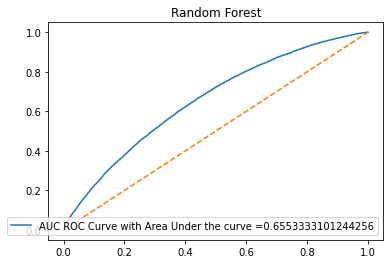

In [0]:
y_pred_proba = rf_clf.predict_proba(X_test_im)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_im,  y_pred_proba)
auc = roc_auc_score(y_test_im, y_pred_proba)
plt.title('Random Forest')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [0]:
XTest = df_test[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 
       'Employment_Type', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 
       'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','age', 'loan_age','avg_accage','avg_credage']]


In [0]:
y_pred_rf_test = rf_clf.predict(XTest)

In [0]:
test_default = pd.DataFrame({"predicted": y_pred_rf_test})
test_default['predicted'].value_counts()

0    112384
1         8
Name: predicted, dtype: int64

#Now, Training model with under sampling

In [0]:
df_1 = pd.concat([X, y.reindex(X.index)], axis=1)

In [0]:
df_1['avg_accage'].astype(float)
df_1['avg_credage'].astype(float)

0          0.000000
1         10.916667
2          0.000000
3         10.250000
4          0.000000
            ...    
233149    30.250000
233150     0.500000
233151     0.000000
233152     0.000000
233153     0.000000
Name: avg_credage, Length: 233154, dtype: float64

In [0]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Employment_Type                      233154 non-null  int64  
 9   State_ID                             233154 non-null  int64  
 10  Employee_code_ID                     233154 non-null  int64  
 11  MobileNo_Avl_

50611
Int64Index([     0,      2,      5,      6,      7,      8,      9,     11,
                16,     17,
            ...
            233144, 233145, 233146, 233147, 233148, 233149, 233150, 233151,
            233152, 233153],
           dtype='int64', length=182543)
Int64Index([     1,      3,      4,     10,     12,     13,     14,     15,
                18,     19,
            ...
            233095, 233098, 233100, 233104, 233105, 233110, 233120, 233121,
            233122, 233128],
           dtype='int64', length=50611)
50611


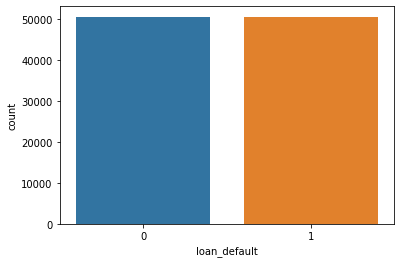

In [0]:
minority_class_len = len(df_1[df_1.loan_default == 1])
print(minority_class_len)

majority_class_indices = df_1[df_1['loan_default'] == 0].index
print(majority_class_indices)

minority_class_indices = df_1[df_1['loan_default'] == 1].index
print(minority_class_indices)

random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = df_1.loc[under_sample_indices]
sns.countplot(x='loan_default', data=under_sample)

In [0]:
US_X = under_sample[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 
       'Employment_Type', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 
       'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','age', 'loan_age','avg_accage','avg_credage']]

US_y = under_sample['loan_default'] 

In [0]:
X_train_us, X_test_us, y_train_us, y_test_us= train_test_split(US_X,US_y, test_size=0.3, random_state=0)

In [0]:
#Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

#Fitting on data
rf_clf.fit(X_train_us, y_train_us)

#Scoring the model on train data
score_rf=rf_clf.score(X_train_us, y_train_us)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=rf_clf.score(X_test_us, y_test_us)
print("Testing score: %.2f " % score_rf)

y_pred_rf = rf_clf.predict(X_test_us)
print(y_pred_rf)

generate_model_report(y_test_us,y_pred_rf)


Training score: 0.64 
Testing score: 0.60 
[1 1 0 ... 1 1 1]
Accuracy =  0.6048671254980735
Precision =  0.5939872273767924
Recall =  0.6520933924201336
F1 Score =  0.6216855314184823


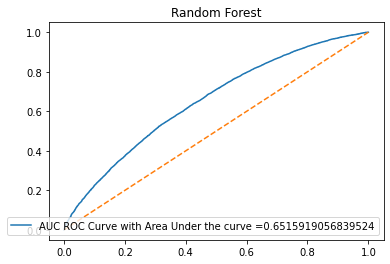

In [0]:
y_pred_proba = rf_clf.predict_proba(X_test_us)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_us,  y_pred_proba)
auc = roc_auc_score(y_test_us,  y_pred_proba)
plt.title('Random Forest')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()



#Now, Training model with over sampling

182543
Int64Index([     0,      2,      5,      6,      7,      8,      9,     11,
                16,     17,
            ...
            233144, 233145, 233146, 233147, 233148, 233149, 233150, 233151,
            233152, 233153],
           dtype='int64', length=182543)
Int64Index([     1,      3,      4,     10,     12,     13,     14,     15,
                18,     19,
            ...
            233095, 233098, 233100, 233104, 233105, 233110, 233120, 233121,
            233122, 233128],
           dtype='int64', length=50611)
182543


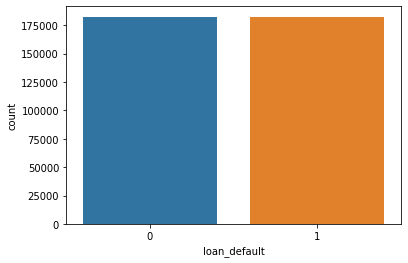

In [0]:
majority_class_len = len(df_1[df_1.loan_default == 0])
print(majority_class_len)

majority_class_indices = df_1[df_1['loan_default'] == 0].index
print(majority_class_indices)

minority_class_indices = df_1[df_1['loan_default'] == 1].index
print(minority_class_indices)

random_minority_indices = np.random.choice(minority_class_indices,
                                           majority_class_len, 
                                           )
print(len(random_minority_indices))

over_sample_indices = np.concatenate([majority_class_indices,random_minority_indices])
over_sample = df_1.loc[over_sample_indices]
sns.countplot(x='loan_default', data=over_sample)

In [0]:
OS_X = over_sample[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 
       'Employment_Type', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 
       'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','age', 'loan_age','avg_accage','avg_credage']]

OS_y = over_sample['loan_default'] 


In [0]:
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(OS_X,OS_y, test_size=0.3, random_state=0)

In [0]:
#Initialising Random Forest model
os_rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

#Fitting on data
os_rf_clf.fit(X_train_os, y_train_os)

#Scoring the model on train data
score_rf=os_rf_clf.score(X_train_os, y_train_os)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=os_rf_clf.score(X_test_os, y_test_os)
print("Testing score: %.2f " % score_rf)

y_pred_rf_os = os_rf_clf.predict(X_test_os)
print(y_pred_rf_os)

generate_model_report(y_test_os,y_pred_rf_os)


Training score: 0.67 
Testing score: 0.65 
[1 1 1 ... 1 0 1]
Accuracy =  0.6487957197377792
Precision =  0.6347648055849234
Recall =  0.6936930328094338
F1 Score =  0.6629219390795331


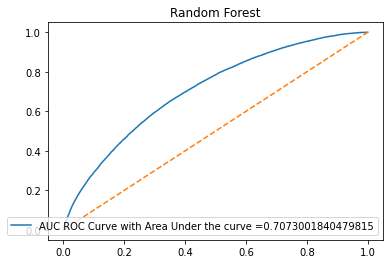

In [0]:
y_pred_proba_os = os_rf_clf.predict_proba(X_test_os)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_os,  y_pred_proba_os)
auc = roc_auc_score(y_test_os,  y_pred_proba_os)
plt.title('Random Forest')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [0]:
#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

# Code starts here
model_2 = RandomForestClassifier(n_estimators=30, random_state = 33)

p_tree = GridSearchCV(estimator=model_2,param_grid=parameter_grid,cv=5)

p_tree.fit(X_train_os, y_train_os)

acc_2 = p_tree.score(X_train_os, y_train_os)

y_pred_hyp = p_tree.predict(OS_X)
print('Accuracy of Grid Seacrch cv = ',acc_2)
# Code ends here

Accuracy of Grid Seacrch cv =  0.6360228517764909


In [0]:
#Scoring the model on train data
score_rf=p_tree.score(X_train_os, y_train_os)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=p_tree.score(X_test_os, y_test_os)
print("Testing score: %.2f " % score_rf)

Training score: 0.64 
Testing score: 0.62 


In [0]:
generate_model_report(y_train_os,y_pred_hyp)

Accuracy =  0.6360228517764909
Precision =  0.6199843668577384
Recall =  0.7063257717785277
F1 Score =  0.6603447016723873


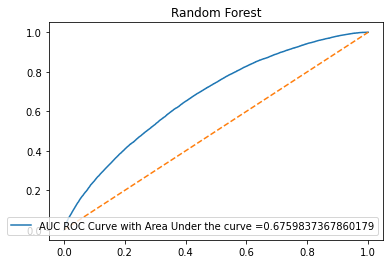

In [0]:
y_pred_proba_hyp = p_tree.predict_proba(X_test_os)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_os,  y_pred_proba_hyp)
auc = roc_auc_score(y_test_os,  y_pred_proba_hyp)
plt.title('Random Forest')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()



#Predicting values of test data

1    72254
0    40138
Name: predicted_loan_default, dtype: int64


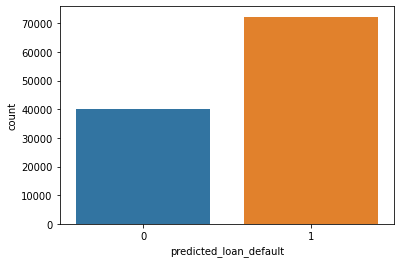

In [0]:
y_pred_rf_test = os_rf_clf.predict(X1)

test_default = pd.DataFrame({'predicted_loan_default': y_pred_rf_test})
print(test_default['predicted_loan_default'].value_counts())
sns.countplot(x='predicted_loan_default', data=test_default)

1    72725
0    39667
Name: predicted_loan_default_hyp, dtype: int64


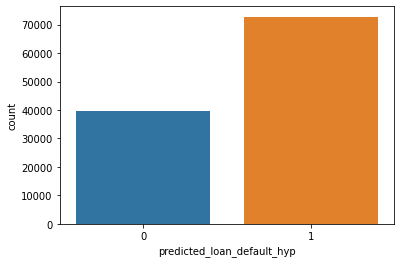

In [0]:
y_pred_rf_test_hyp = p_tree.predict(X1)

test_default_hyp = pd.DataFrame({'predicted_loan_default_hyp': y_pred_rf_test_hyp})
print(test_default_hyp['predicted_loan_default_hyp'].value_counts())
sns.countplot(x='predicted_loan_default_hyp', data=test_default_hyp)

In [0]:
df_final = pd.concat([X1, test_default.reindex(X1.index)], axis=1)

In [0]:
df_final.shape

(112392, 40)

In [0]:
df_final.to_csv('drive/My Drive/loan defaulter Aws/final.csv', sep='\t', encoding='utf-8')
